In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SUV_DATA = pd.read_csv(r'E:\python projects\Datasets\cars sales\suv_cars_only.csv')
SUV_DATA.head()

,id,Company,Car Model,Trim/Model,Year,Category,Price (SAR),Tax (15%) SAR,Nationality,Energy Type,Fuel Usage (km/L),Tank Size (L),Fuel/Electric Economy,Transmission
0,37,Mercedes-Benz,G-Class,G 63 AMG,2024,SUV,1150000,172500,Germany,Gasoline,7.0,100.0,14.29 L/100 km,Automatic
1,38,Land Rover,Defender,P400 X-Dynamic,2023,SUV,350000,52500,United Kingdom,Gasoline,9.5,90.0,10.53 L/100 km,Automatic
2,34,Chevrolet,Tahoe,LS,2024,SUV,228850,34327,USA,Gasoline,10.2,91.0,9.80 L/100 km,Automatic
3,32,Nissan,Patrol,XE,2024,SUV,186300,27945,Japan,Gasoline,10.0,140.0,10.00 L/100 km,Automatic
4,27,Porsche,Macan,S,2020,SUV,160000,24000,Germany,Gasoline,10.0,65.0,10.00 L/100 km,Automatic


In [3]:
SUV_DATA.drop('Fuel/Electric Economy', axis=1, inplace=True)

SUV_DATA['Total_Mileage'] = SUV_DATA['Fuel Usage (km/L)'] * SUV_DATA['Tank Size (L)']
SUV_DATA['Total_Mileage']

0      700.0
1      855.0
2      928.2
3     1400.0
4      650.0
5      809.4
6      660.0
7     1440.0
8     1200.0
9      792.0
10     783.0
11    1020.0
12     780.0
13     825.0
14    1210.0
15     840.0
16     784.0
17     728.0
18     715.0
19     648.0
Name: Total_Mileage, dtype: float64

In [4]:
SUV_DATA.describe()

,id,Year,Price (SAR),Tax (15%) SAR,Fuel Usage (km/L),Tank Size (L),Total_Mileage
count,20.000000,20.00000,2.000000e+01,20.000000,20.000000,20.00000,20.000000
mean,25.250000,2021.10000,1.840020e+05,27600.250000,13.280000,70.10000,888.380000
std,9.781158,2.04939,2.366068e+05,35491.023136,4.067406,22.06426,240.643339
min,6.000000,2018.00000,7.000000e+04,10500.000000,7.000000,50.00000,648.000000
25%,19.750000,2019.75000,9.375000e+04,14062.500000,10.800000,55.75000,724.750000
50%,24.500000,2021.00000,1.175000e+05,17625.000000,12.500000,60.00000,800.700000
75%,33.250000,2023.00000,1.599175e+05,23987.250000,14.250000,75.75000,951.150000
max,40.000000,2024.00000,1.150000e+06,172500.000000,24.000000,140.00000,1440.000000


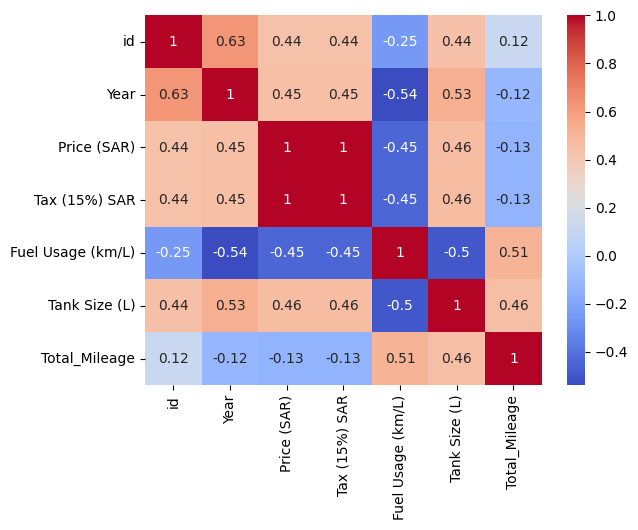

In [5]:
sns.heatmap(SUV_DATA.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
SUV_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20 non-null     int64  
 1   Company            20 non-null     object 
 2   Car Model          20 non-null     object 
 3   Trim/Model         19 non-null     object 
 4   Year               20 non-null     int64  
 5   Category           20 non-null     object 
 6   Price (SAR)        20 non-null     int64  
 7   Tax (15%) SAR      20 non-null     int64  
 8   Nationality        20 non-null     object 
 9   Energy Type        20 non-null     object 
 10  Fuel Usage (km/L)  20 non-null     float64
 11  Tank Size (L)      20 non-null     float64
 12  Transmission       20 non-null     object 
 13  Total_Mileage      20 non-null     float64
dtypes: float64(3), int64(4), object(7)
memory usage: 2.3+ KB


In [7]:
SUV_DATA.isnull().sum()

id                   0
Company              0
Car Model            0
Trim/Model           1
Year                 0
Category             0
Price (SAR)          0
Tax (15%) SAR        0
Nationality          0
Energy Type          0
Fuel Usage (km/L)    0
Tank Size (L)        0
Transmission         0
Total_Mileage        0
dtype: int64

In [8]:
SUV_DATA[SUV_DATA.isnull().any(axis=1)]

,id,Company,Car Model,Trim/Model,Year,Category,Price (SAR),Tax (15%) SAR,Nationality,Energy Type,Fuel Usage (km/L),Tank Size (L),Transmission,Total_Mileage
7,23,Land Rover,Discovery Sport,NaN,2018,SUV,140000,21000,United Kingdom,Diesel,16.0,90.0,Automatic,1440.0


In [9]:
SUV_DATA.duplicated().sum()

np.int64(0)

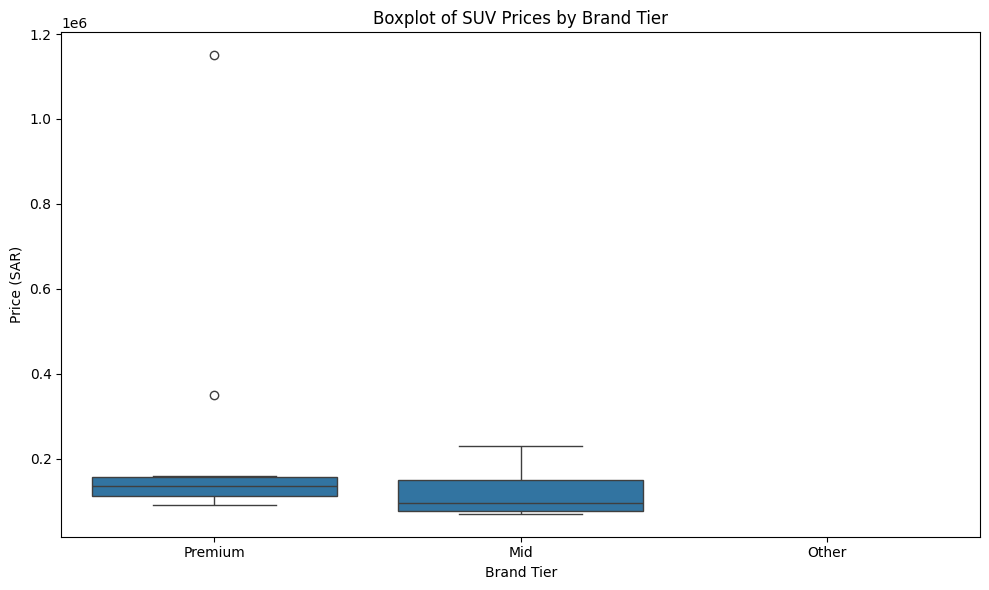

In [ ]:
# Define brand tiers (example: you may adjust these based on your business logic)
premium_brands = ['Mercedes-Benz', 'Land Rover', 'Porsche', 'BMW', 'Audi', 'Jaguar', 'Lexus', 'Volvo']
mid_brands = ['Kia', 'Chevrolet', 'Volkswagen', 'Nissan', 'Subaru', 'Mazda', 'Mitsubishi', 'Toyota']

def get_brand_tier(company):
    if company in premium_brands:
        return 'Premium'
    elif company in mid_brands:
        return 'Mid'
    else:
        return 'Other'

SUV_DATA['Brand_Tier'] = SUV_DATA['Company'].apply(get_brand_tier)

plt.figure(figsize=(10, 6))
sns.boxplot(data=SUV_DATA, x='Brand_Tier', y='Price (SAR)', order=['Premium', 'Mid', 'Other'])
plt.title('Boxplot of SUV Prices by Brand Tier')
plt.xlabel('Brand Tier')
plt.ylabel('Price (SAR)')
plt.tight_layout()
plt.show()

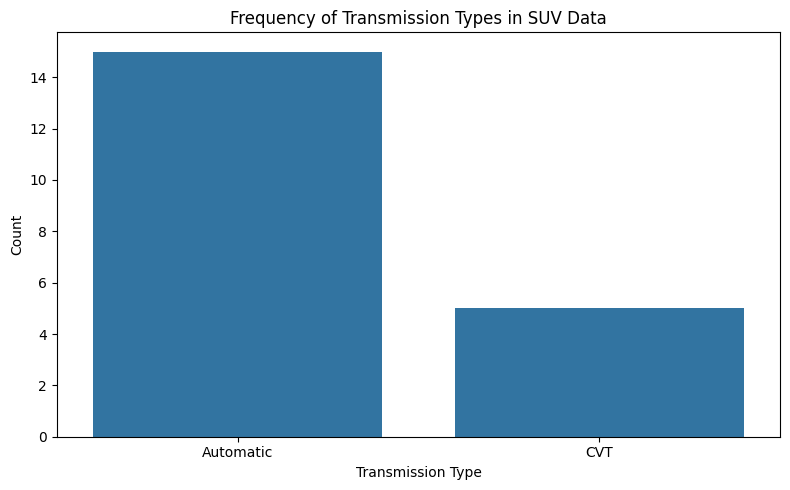

In [ ]:
# Plot the frequency of each transmission type in SUV_DATA
plt.figure(figsize=(8, 5))
sns.countplot(data=SUV_DATA, x='Transmission', order=SUV_DATA['Transmission'].value_counts().index)
plt.title('Frequency of Transmission Types in SUV Data')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

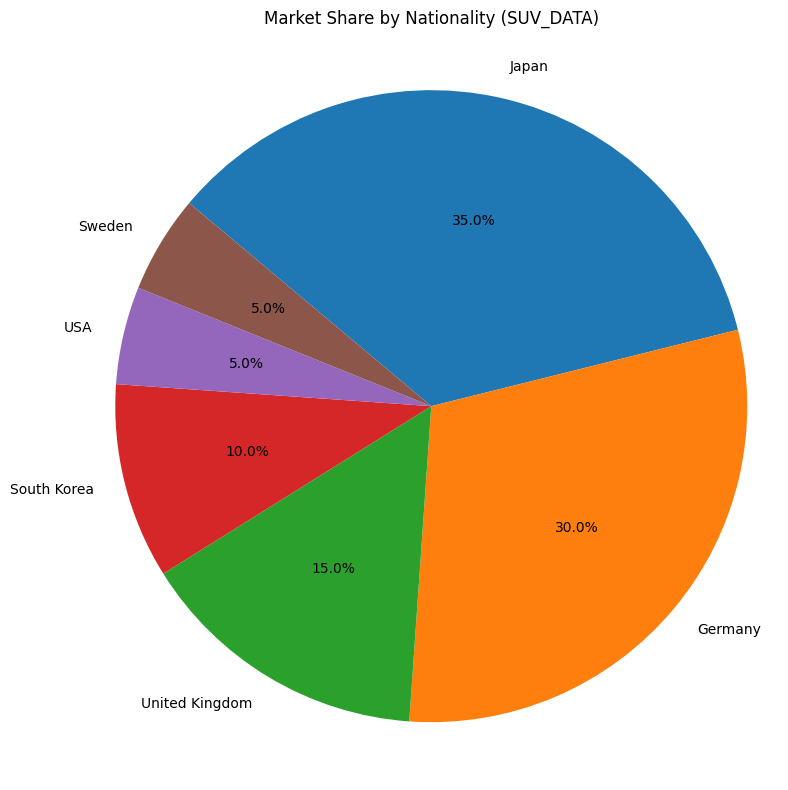

In [ ]:
# Pie chart of market share by nationality in SUV_DATA
nationality_counts = SUV_DATA['Nationality'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Market Share by Nationality (SUV_DATA)')
plt.axis('equal')
plt.tight_layout()
plt.show()

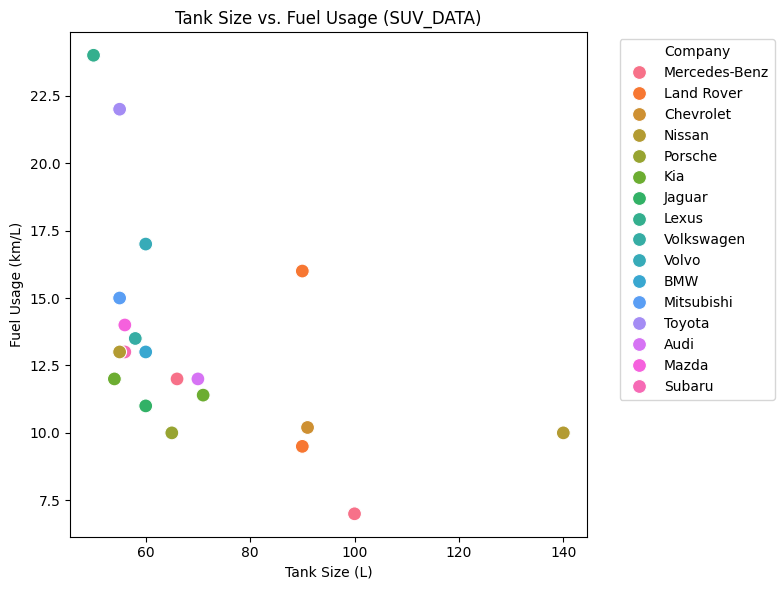

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=SUV_DATA, x='Tank Size (L)', y='Fuel Usage (km/L)', hue='Company', s=100)
plt.title('Tank Size vs. Fuel Usage (SUV_DATA)')
plt.xlabel('Tank Size (L)')
plt.ylabel('Fuel Usage (km/L)')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
SUV_DATA.head()

,id,Company,Car Model,Trim/Model,Year,Category,Price (SAR),Tax (15%) SAR,Nationality,Energy Type,Fuel Usage (km/L),Tank Size (L),Transmission,Total_Mileage
0,37,Mercedes-Benz,G-Class,G 63 AMG,2024,SUV,1150000,172500,Germany,Gasoline,7.0,100.0,Automatic,700.0
1,38,Land Rover,Defender,P400 X-Dynamic,2023,SUV,350000,52500,United Kingdom,Gasoline,9.5,90.0,Automatic,855.0
2,34,Chevrolet,Tahoe,LS,2024,SUV,228850,34327,USA,Gasoline,10.2,91.0,Automatic,928.2
3,32,Nissan,Patrol,XE,2024,SUV,186300,27945,Japan,Gasoline,10.0,140.0,Automatic,1400.0
4,27,Porsche,Macan,S,2020,SUV,160000,24000,Germany,Gasoline,10.0,65.0,Automatic,650.0


In [11]:
SUV_DATA['Year'].value_counts().sort_values(ascending=False)

Year
2024    4
2020    4
2019    3
2021    3
2023    2
2018    2
2022    2
Name: count, dtype: int64

In [12]:
SUV_DATA.groupby('Transmission')['Price (SAR)'].agg(['min', 'mean', 'max'])

,min,mean,max
Transmission,,,
Automatic,70000,214002.666667,1150000
CVT,72000,94000.000000,130000


In [13]:
SUV_DATA.groupby('Energy Type')['Fuel Usage (km/L)'].agg(['min', 'mean', 'max'])

,min,mean,max
Energy Type,,,
Diesel,16.0,16.5000,17.0
Gasoline,7.0,11.6625,15.0
Hybrid,22.0,23.0000,24.0


In [14]:
Sale_DATA = pd.read_csv(r'E:\python projects\Datasets\cars sales\car_sales_data.csv')
Sale_DATA.head()

,Sale_ID,Date_of_Sale,Car_ID,Initial_List_Price,Sale_Price,Customer_ID,Sales_Representative_ID,Campaign_ID
0,1,2024-12-08,22,150000,132177.395177,CUST0324,SALES011,969.0
1,2,2023-09-29,32,186300,165345.813331,CUST0347,SALES033,494.0
2,3,2024-11-08,6,72000,66475.528411,CUST0317,SALES046,817.0
3,4,2024-05-20,25,120000,103709.040550,CUST0241,SALES035,NaN
4,5,2023-06-09,12,70000,59066.507480,CUST0335,SALES034,NaN


In [15]:
Sale_DATA['price_variation'] =  Sale_DATA['Initial_List_Price'] - Sale_DATA['Sale_Price'] 
Sale_DATA.head()

,Sale_ID,Date_of_Sale,Car_ID,Initial_List_Price,Sale_Price,Customer_ID,Sales_Representative_ID,Campaign_ID,price_variation
0,1,2024-12-08,22,150000,132177.395177,CUST0324,SALES011,969.0,17822.604823
1,2,2023-09-29,32,186300,165345.813331,CUST0347,SALES033,494.0,20954.186669
2,3,2024-11-08,6,72000,66475.528411,CUST0317,SALES046,817.0,5524.471589
3,4,2024-05-20,25,120000,103709.040550,CUST0241,SALES035,NaN,16290.959450
4,5,2023-06-09,12,70000,59066.507480,CUST0335,SALES034,NaN,10933.492520


In [16]:
Sale_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_ID                  15000 non-null  int64  
 1   Date_of_Sale             15000 non-null  object 
 2   Car_ID                   15000 non-null  int64  
 3   Initial_List_Price       15000 non-null  int64  
 4   Sale_Price               15000 non-null  float64
 5   Customer_ID              15000 non-null  object 
 6   Sales_Representative_ID  15000 non-null  object 
 7   Campaign_ID              10500 non-null  float64
 8   price_variation          15000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.0+ MB


In [17]:
Sale_DATA.duplicated().sum()

np.int64(0)

In [18]:
Sale_DATA.isnull().sum()

Sale_ID                       0
Date_of_Sale                  0
Car_ID                        0
Initial_List_Price            0
Sale_Price                    0
Customer_ID                   0
Sales_Representative_ID       0
Campaign_ID                4500
price_variation               0
dtype: int64

In [19]:
Sale_DATA.describe()

,Sale_ID,Car_ID,Initial_List_Price,Sale_Price,Campaign_ID,price_variation
count,15000.000000,15000.000000,1.500000e+04,1.500000e+04,10500.000000,15000.000000
mean,7500.500000,25.198533,1.828956e+05,1.554442e+05,505.447143,27451.405236
std,4330.271354,9.495518,2.296590e+05,1.959814e+05,288.484488,38443.856394
min,1.000000,6.000000,7.000000e+04,5.250290e+04,1.000000,3509.206335
25%,3750.750000,19.000000,9.000000e+04,7.655496e+04,259.000000,11558.014170
50%,7500.500000,24.000000,1.200000e+05,1.008959e+05,506.000000,17545.254857
75%,11250.250000,33.000000,1.598900e+05,1.377495e+05,759.000000,26647.735191
max,15000.000000,40.000000,1.150000e+06,1.092375e+06,1000.000000,287429.297216


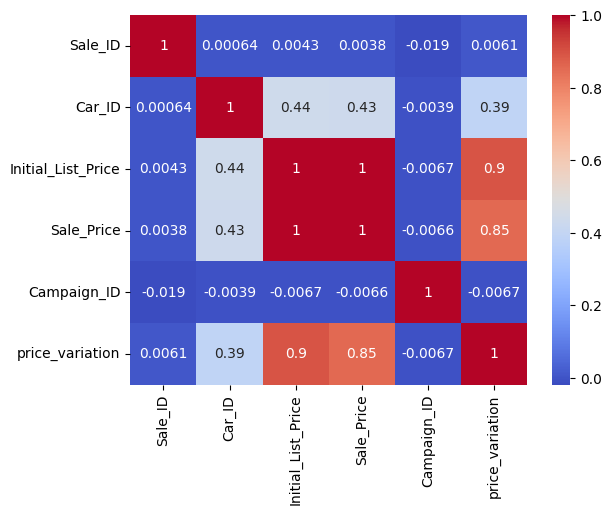

In [20]:
sns.heatmap(Sale_DATA.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
Sale_DATA['Campaign_ID'] = Sale_DATA['Campaign_ID'].astype('Int64')

In [22]:
Sale_DATA['Sales_Representative_ID'].value_counts().sort_values(ascending=False)

Sales_Representative_ID
SALES040    450
SALES016    431
SALES015    407
SALES020    403
SALES023    390
SALES036    382
SALES038    379
SALES029    375
SALES025    368
SALES042    361
SALES033    348
SALES048    346
SALES019    346
SALES037    340
SALES050    337
SALES005    331
SALES011    331
SALES017    326
SALES047    320
SALES004    319
SALES030    315
SALES045    308
SALES032    299
SALES027    293
SALES013    291
SALES018    287
SALES043    284
SALES034    283
SALES028    280
SALES031    274
SALES044    274
SALES024    271
SALES014    265
SALES041    263
SALES039    260
SALES026    259
SALES022    255
SALES003    255
SALES049    252
SALES006    250
SALES001    244
SALES008    237
SALES002    234
SALES010    229
SALES009    227
SALES021    224
SALES012    216
SALES046    214
SALES007    200
SALES035    167
Name: count, dtype: int64

In [23]:
Sale_DATA['Campaign_ID'].value_counts().sort_values(ascending=False)

Campaign_ID
961    20
744    20
191    19
182    19
829    19
       ..
19      3
228     3
448     3
341     3
308     2
Name: count, Length: 1000, dtype: Int64

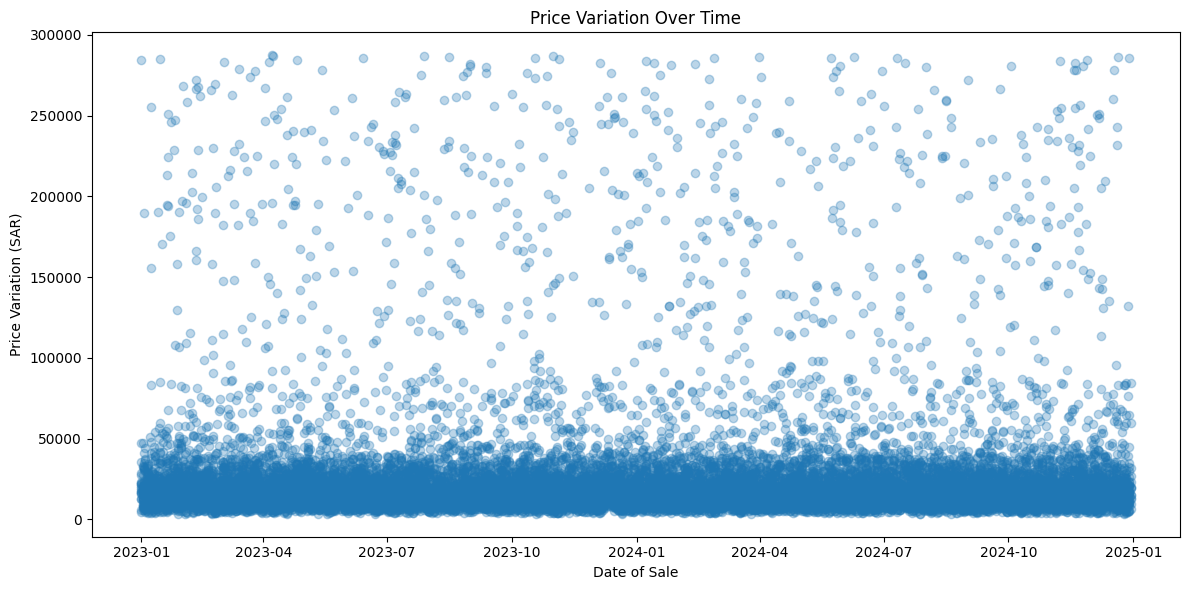

In [24]:
Sale_DATA['Date_of_Sale'] = pd.to_datetime(Sale_DATA['Date_of_Sale'])
Sale_DATA.sort_values('Date_of_Sale', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(Sale_DATA['Date_of_Sale'], Sale_DATA['price_variation'], marker='o', linestyle='', alpha=0.3)
plt.title('Price Variation Over Time')
plt.xlabel('Date of Sale')
plt.ylabel('Price Variation (SAR)')
plt.tight_layout()
plt.show()

In [25]:
# Define new bins from 0 to 300000 with appropriate intervals
custom_bins = np.arange(0, 300001, 50000)  # [0, 50000, 100000, 150000, 200000, 250000, 300000]
custom_labels = [f'{custom_bins[i]}-{custom_bins[i+1]}' for i in range(len(custom_bins)-1)]

# Filter only positive price_variation values up to 300000
filtered = Sale_DATA[(Sale_DATA['price_variation'] >= 0) & (Sale_DATA['price_variation'] <= 300000)]

# Bin the price_variation and calculate percentage
filtered['custom_bin'] = pd.cut(filtered['price_variation'], bins=custom_bins, labels=custom_labels, include_lowest=True)
percentage_custom_bins = filtered['custom_bin'].value_counts(normalize=True).sort_index() * 100
percentage_custom_bins

custom_bin
0-50000          91.800000
50000-100000      4.200000
100000-150000     1.040000
150000-200000     1.040000
200000-250000     1.146667
250000-300000     0.773333
Name: proportion, dtype: float64

In [26]:
Sale_DATA['Campaign_ID'].unique().tolist()

[587,
 717,
 340,
 732,
 834,
 166,
 646,
 <NA>,
 798,
 991,
 184,
 129,
 515,
 447,
 141,
 543,
 747,
 114,
 649,
 938,
 468,
 776,
 449,
 811,
 487,
 915,
 334,
 490,
 609,
 388,
 400,
 919,
 534,
 355,
 446,
 547,
 58,
 980,
 737,
 107,
 598,
 531,
 877,
 311,
 74,
 14,
 806,
 409,
 458,
 521,
 329,
 735,
 600,
 981,
 150,
 902,
 760,
 808,
 112,
 545,
 894,
 332,
 252,
 111,
 734,
 336,
 930,
 670,
 897,
 637,
 264,
 87,
 328,
 309,
 923,
 222,
 78,
 510,
 225,
 317,
 538,
 335,
 396,
 864,
 139,
 13,
 143,
 69,
 322,
 633,
 999,
 277,
 571,
 767,
 668,
 803,
 284,
 976,
 478,
 453,
 738,
 764,
 295,
 855,
 195,
 870,
 831,
 974,
 418,
 24,
 303,
 187,
 68,
 218,
 168,
 853,
 327,
 291,
 674,
 415,
 121,
 714,
 757,
 55,
 586,
 344,
 814,
 173,
 963,
 917,
 562,
 10,
 367,
 234,
 869,
 934,
 634,
 799,
 782,
 160,
 943,
 410,
 405,
 568,
 435,
 920,
 692,
 643,
 455,
 612,
 761,
 54,
 305,
 860,
 628,
 270,
 625,
 927,
 603,
 466,
 546,
 567,
 343,
 430,
 582,
 76,
 654,
 359,
 650

In [27]:
Showroom_DATA = pd.read_csv(r'E:\python projects\Datasets\cars sales\showroom_visits.csv')
Showroom_DATA.head()

,Visit_ID,Date_of_Visit,Car_ID_Visited,Customer_ID,Outcome,Sales_Representative_ID
0,1,2023-05-29,14,CUST0039,No Sale,SALES036
1,2,2023-11-04,22,CUST0134,No Sale,SALES044
2,3,2024-09-28,19,CUST0399,Sale Successful,SALES047
3,4,2023-07-07,20,CUST0196,No Sale,SALES025
4,5,2024-11-03,33,CUST0464,Sale Successful,SALES045


In [28]:
Showroom_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Visit_ID                 1000 non-null   int64 
 1   Date_of_Visit            1000 non-null   object
 2   Car_ID_Visited           1000 non-null   int64 
 3   Customer_ID              1000 non-null   object
 4   Outcome                  1000 non-null   object
 5   Sales_Representative_ID  1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [29]:
Showroom_DATA.duplicated().sum()

np.int64(0)

In [30]:
Showroom_DATA.isnull().sum()

Visit_ID                   0
Date_of_Visit              0
Car_ID_Visited             0
Customer_ID                0
Outcome                    0
Sales_Representative_ID    0
dtype: int64

In [31]:
Showroom_DATA['Outcome'].value_counts(normalize=True) * 100

Outcome
No Sale            72.9
Sale Successful    27.1
Name: proportion, dtype: float64

In [32]:

Showroom_DATA[Showroom_DATA['Outcome'] == 'Sale Successful']['Sales_Representative_ID'].value_counts()

Sales_Representative_ID
SALES050    10
SALES023     9
SALES016     9
SALES040     9
SALES029     8
SALES048     8
SALES037     8
SALES026     8
SALES014     7
SALES002     7
SALES013     7
SALES015     7
SALES041     7
SALES022     7
SALES018     7
SALES005     7
SALES004     7
SALES028     6
SALES036     6
SALES033     6
SALES043     6
SALES011     6
SALES017     5
SALES025     5
SALES019     5
SALES046     5
SALES045     5
SALES009     5
SALES031     5
SALES020     5
SALES044     5
SALES008     5
SALES027     5
SALES047     4
SALES038     4
SALES032     4
SALES039     4
SALES035     4
SALES034     4
SALES006     4
SALES042     4
SALES021     3
SALES007     3
SALES001     3
SALES049     3
SALES024     2
SALES010     2
SALES003     2
SALES012     2
SALES030     2
Name: count, dtype: int64

In [33]:
Showroom_DATA[Showroom_DATA['Outcome'] == 'Sale Successful'].groupby('Car_ID_Visited').size().sort_values(ascending=False)

Car_ID_Visited
33    20
24    19
21    18
22    17
27    15
37    15
25    14
6     14
23    14
14    13
12    13
13    13
20    13
38    13
32    12
34    11
39    11
19     9
40     9
26     8
dtype: int64

In [34]:
marketing_offers_DATA = pd.read_csv(r'E:\python projects\Datasets\cars sales\marketing_offers.csv')
marketing_offers_DATA.head()

,Campaign_ID,Car_ID,Offer_Start_Date,Offer_End_Date,Discount_Percentage,Result
0,1,27,2024-12-14,2025-01-17,16.68,No Sale
1,2,27,2024-11-18,2024-12-05,7.02,No Sale
2,3,22,2023-08-30,2023-09-28,5.96,No Sale
3,4,20,2024-12-23,2025-02-11,10.35,No Sale
4,5,40,2024-10-27,2024-12-15,17.10,No Sale


In [35]:
marketing_offers_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign_ID          1000 non-null   int64  
 1   Car_ID               1000 non-null   int64  
 2   Offer_Start_Date     1000 non-null   object 
 3   Offer_End_Date       1000 non-null   object 
 4   Discount_Percentage  1000 non-null   float64
 5   Result               1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [36]:
marketing_offers_DATA.duplicated().sum()

np.int64(0)

In [37]:
marketing_offers_DATA.isnull().sum()

Campaign_ID            0
Car_ID                 0
Offer_Start_Date       0
Offer_End_Date         0
Discount_Percentage    0
Result                 0
dtype: int64

In [38]:
marketing_offers_DATA.describe()

,Campaign_ID,Car_ID,Discount_Percentage
count,1000.000000,1000.000000,1000.000000
mean,500.500000,25.101000,14.602400
std,288.819436,9.591079,5.743301
min,1.000000,6.000000,5.040000
25%,250.750000,19.000000,9.625000
50%,500.500000,24.000000,14.390000
75%,750.250000,34.000000,19.432500
max,1000.000000,40.000000,24.990000


In [39]:
marketing_offers_DATA.groupby('Result')['Discount_Percentage'].mean()

Result
No Sale             14.553247
Offer Successful    14.713355
Name: Discount_Percentage, dtype: float64

In [40]:
marketing_offers_DATA['Result'].value_counts(normalize=True) * 100

Result
No Sale             69.3
Offer Successful    30.7
Name: proportion, dtype: float64

In [41]:
NOT_SUCCESSFUL_offers = marketing_offers_DATA[marketing_offers_DATA['Result'] == 'No Sale']
NOT_SUCCESSFUL_offers

,Campaign_ID,Car_ID,Offer_Start_Date,Offer_End_Date,Discount_Percentage,Result
0,1,27,2024-12-14,2025-01-17,16.68,No Sale
1,2,27,2024-11-18,2024-12-05,7.02,No Sale
2,3,22,2023-08-30,2023-09-28,5.96,No Sale
3,4,20,2024-12-23,2025-02-11,10.35,No Sale
4,5,40,2024-10-27,2024-12-15,17.10,No Sale
...,...,...,...,...,...,...
989,990,38,2024-12-20,2025-02-05,10.23,No Sale
990,991,25,2023-10-11,2023-11-27,24.39,No Sale
994,995,32,2023-10-31,2023-11-09,14.62,No Sale
996,997,27,2024-10-04,2024-11-11,21.85,No Sale


In [42]:
campaign_ids = [969,
 494,
 817,
 507,
 257,
 72,
 635,
 662,
 37,
 945,
 757,
 178,
 580,
 487,
 83,
 14,
 49,
 751,
 610,
 728,
 247,
 267,
 937,
 718,
 588,
 638,
 63,
 967,
 897,
 472,
 994,
 181,
 391,
 117,
 265,
 528,
 234,
 90,
 790,
 734,
 761,
 382,
 34,
 133,
 804,
 248,
 20,
 707,
 833,
 154,
 809,
 998,
 586,
 94,
 987,
 561,
 358,
 364,
 753,
 60,
 884,
 135,
 41,
 827,
 523,
 754,
 697,
 832,
 950,
 446,
 48,
 566,
 648,
 348,
 981,
 245,
 165,
 525,
 79,
 552,
 639,
 239,
 511,
 533,
 44,
 489,
 594,
 316,
 719,
 408,
 109,
 766,
 255,
 484,
 700,
 824,
 637,
 545,
 3,
 895,
 590,
 104,
 483,
 852,
 855,
 557,
 498,
 305,
 671,
 202,
 829,
 789,
 956,
 571,
 179,
 703,
 749,
 611,
 769,
 793,
 180,
 432,
 736,
 17,
 182,
 436,
 477,
 542,
 64,
 42,
 39,
 674,
 783,
 404,
 183,
 642,
 396,
 999,
 456,
 74,
 199,
 271,
 770,
 196,
 596,
 238,
 859,
 667,
 531,
 264,
 856,
 319,
 544,
 315,
 283,
 191,
 375,
 862,
 475,
 526,
 910,
 24,
 115,
 847,
 737,
 624,
 623,
 556,
 782,
 224,
 553,
 440,
 903,
 612,
 172,
 295,
 630,
 27,
 237,
 298,
 516,
 835,
 948,
 810,
 901,
 675,
 120,
 863,
 508,
 225,
 574,
 797,
 587,
 169,
 402,
 894,
 106,
 529,
 740,
 185,
 369,
 111,
 988,
 995,
 354,
 259,
 5,
 31,
 162,
 609,
 966,
 386,
 105,
 604,
 711,
 409,
 811,
 460,
 546,
 457,
 547,
 139,
 629,
 68,
 807,
 401,
 250,
 50,
 426,
 970,
 868,
 883,
 713,
 892,
 519,
 869,
 591,
 701,
 805,
 407,
 806,
 942,
 226,
 455,
 778,
 35,
 215,
 400,
 722,
 541,
 649,
 655,
 692,
 25,
 905,
 921,
 560,
 760,
 85,
 414,
 931,
 597,
 791,
 306,
 605,
 113,
 213,
 470,
 442,
 870,
 52,
 326,
 984,
 324,
 663,
 29,
 209,
 16,
 919,
 814,
 871,
 953,
 322,
 563,
 313,
 279,
 726,
 385,
 419,
 515,
 445,
 76,
 559,
 946,
 317,
 370,
 141,
 720,
 437,
 177,
 512,
 963,
 748,
 214,
 469,
 952,
 880,
 583,
 564,
 379,
 717,
 184,
 631,
 194,
 747,
 650,
 621,
 327,
 899,
 290,
 786,
 687,
 527,
 729,
 993,
 420,
 925,
 416,
 524,
 907,
 828,
 304,
 500,
 636,
 243,
 158,
 393,
 492,
 735,
 622,
 615,
 278,
 260,
 107,
 933,
 691,
 548,
 739,
 582,
 227,
 263,
 744,
 217,
 538,
 328,
 888,
 730,
 288,
 652,
 312,
 98,
 336,
 465,
 101,
 996,
 321,
 108,
 53,
 280,
 685,
 979,
 399,
 371,
 365,
 845,
 289,
 784,
 367,
 906,
 879,
 91,
 795,
 727,
 858,
 839,
 99,
 222,
 985,
 221,
 929,
 9,
 164,
 163,
 922,
 745,
 167,
 822,
 975,
 431,
 881,
 18,
 216,
 875,
 660,
 746,
 848,
 207,
 889,
 388,
 310,
 818,
 490,
 302,
 530,
 830,
 891,
 972,
 934,
 70,
 877,
 704,
 808,
 659,
 339,
 190,
 276,
 441,
 430,
 56,
 466,
 709,
 885,
 338,
 333,
 577,
 474,
 911,
 87,
 787,
 32,
 915,
 377,
 909,
 122,
 452,
 992,
 647,
 11,
 980,
 92,
 513,
 175,
 565,
 137,
 986,
 834,
 352,
 297,
 251,
 362,
 272,
 126,
 114,
 277,
 522,
 593,
 480,
 193,
 423,
 67,
 450,
 742,
 148,
 532,
 627,
 311,
 873,
 578,
 628,
 323,
 616,
 916,
 360,
 170,
 501,
 535,
 51,
 89,
 549,
 372,
 543,
 411,
 763,
 681,
 941,
 677,
 750,
 65,
 917,
 309,
 413,
 299,
 802,
 102,
 665,
 632,
 118,
 1000,
 291,
 378,
 978,
 119,
 331,
 33,
 705,
 645,
 444,
 575,
 340,
 88,
 81,
 412,
 485,
 268,
 46,
 459,
 285,
 458,
 625,
 821,
 345,
 539,
 349,
 390,
 219,
 424,
 752,
 777,
 376,
 262,
 721,
 716,
 130,
 812,
 453,
 374,
 940,
 496,
 301,
 403,
 964,
 570,
 40,
 927,
 724,
 696,
 467,
 932,
 936,
 488,
 990,
 558,
 204,
 706,
 600,
 668,
 22,
 96,
 342,
 823,
 983,
 145,
 581,
 373,
 296,
 73,
 844,
 149,
 602,
 166,
 618,
 837,
 254,
 853,
 356,
 205,
 394,
 935,
 208,
 270,
 449,
 568,
 962,
 683,
 772,
 702,
 816,
 874,
 282,
 741,
 269,
 517,
 47,
 838,
 429,
 198,
 562,
 961,
 550,
 819,
 918,
 723,
 710,
 634,
 80,
 146,
 898,
 960,
 758,
 944,
 913,
 253,
 156,
 698,
 61,
 654,
 924,
 428,
 211,
 798,
 820,
 536,
 958,
 241,
 651,
 764,
 236,
 8,
 957,
 28,
 973,
 867,
 131,
 210,
 84,
 359,
 174,
 576,
 866,
 768,
 275,
 454,
 451,
 395,
 977,
 893,
 640,
 347,
 417,
 951,
 938,
 78,
 673,
 330,
 843,
 569,
 346,
 997,
 644,
 861,
 954,
 780,
 26,
 755,
 147,
 803,
 930,
 771,
 926,
 220,
 732,
 756,
 435,
 939,
 534,
 695,
 150,
 497,
 161,
 521,
 71,
 21,
 86,
 116,
 851,
 286,
 45,
 58,
 476,
 325,
 329,
 121,
 134,
 212,
 959,
 318,
 6,
 481,
 188,
 160,
 287,
 128,
 850,
 774,
 699,
 142,
 421,
 589,
 231,
 664,
 504,
 140,
 599,
 619,
 252,
 439,
 12,
 947,
 643,
 731,
 567,
 344,
 878,
 361,
 854,
 693,
 781,
 813,
 555,
 258,
 443,
 857,
 415,
 351,
 974,
 684,
 849,
 943,
 923,
 738,
 801,
 218,
 434,
 825,
 573,
 626,
 468,
 355,
 153,
 876,
 368,
 714,
 195,
 579,
 95,
 427,
 759,
 518,
 197,
 100,
 303,
 448,
 55,
 363,
 914,
 601,
 422,
 187,
 447,
 776,
 971,
 425,
 743,
 872,
 882,
 514,
 380,
 506,
 799,
 887,
 294,
 230,
 97,
 261,
 865,
 646,
 293,
 397,
 502,
 592,
 908,
 607,
 77,
 15,
 765,
 991,
 136,
 284,
 66,
 123,
 335,
 281,
 125,
 666,
 688,
 206,
 689,
 112,
 19,
 773,
 598,
 896,
 584,
 129,
 233,
 614,
 357,
 505,
 292,
 840,
 846,
 680,
 59,
 989,
 389,
 482,
 785,
 902,
 461,
 509,
 658,
 679,
 792,
 57,
 499,
 246,
 176,
 788,
 151,
 479,
 800,
 93,
 495,
 343,
 82,
 796,
 900,
 554,
 464,
 904,
 438,
 842,
 353,
 486,
 223,
 228,
 976,
 661,
 242,
 794,
 890,
 779,
 341,
 383,
 767,
 672,
 613,
 240,
 366,
 603,
 30,
 864,
 186,
 173,
 10,
 266,
 249,
 387,
 314,
 7,
 608,
 124,
 110,
 13,
 982,
 775,
 381,
 712,
 715,
 392,
 815,
 686,
 232,
 503,
 955,
 928,
 256,
 463,
 433,
 62,
 203,
 478,
 694,
 405,
 350,
 510,
 273,
 690,
 23,
 860,
 678,
 551,
 537,
 540,
 733,
 320,
 617,
 168,
 332,
 708,
 307,
 471,
 36,
 157,
 585,
 682,
 300,
 155,
 69,
 244,
 159,
 912,
 38,
 657,
 144,
 493,
 274,
 152,
 725,
 43,
 572,
 836,
 192,
 406,
 676,
 965,
 886,
 138,
 4,
 54,
 189,
 473,
 200,
 491,
 75,
 418,
 235,
 826,
 595,
 229,
 2,
 949,
 334,
 1,
 968,
 520,
 127,
 920,
 620,
 171,
 606,
 633,
 132,
 103,
 641,
 462,
 337,
 384,
 669,
 831,
 201,
 410,
 143,
 762,
 670,
 653,
 841,
 398,
 656]

success_rates = {}

for cid in campaign_ids:
    total = Sale_DATA[Sale_DATA['Campaign_ID'] == cid].shape[0]
    successful = marketing_offers_DATA[(marketing_offers_DATA['Campaign_ID'] == cid) & (marketing_offers_DATA['Result'] == 'Offer Successful')].shape[0]
    rate = (successful / total * 100) if total > 0 else 0
    success_rates[cid] = rate

pd.DataFrame(list(success_rates.items()), columns=['Campaign_ID', 'Success_Rate (%)']).sort_values(by='Success_Rate (%)', ascending=False)

,Campaign_ID,Success_Rate (%)
872,341,33.333333
818,19,33.333333
907,463,25.000000
869,794,25.000000
400,18,25.000000
...,...,...
220,547,0.000000
14,83,0.000000
109,202,0.000000
108,671,0.000000


In [43]:
NOT_SUCCESSFUL_offers['Car_ID'].value_counts()

Car_ID
23    44
38    43
14    43
34    41
13    40
24    39
37    39
27    38
22    37
20    36
32    35
25    34
6     33
21    30
39    30
19    29
40    27
26    26
12    25
33    24
Name: count, dtype: int64

In [44]:
successful_offers = marketing_offers_DATA[marketing_offers_DATA['Result'] == 'Offer Successful']
successful_offers

,Campaign_ID,Car_ID,Offer_Start_Date,Offer_End_Date,Discount_Percentage,Result
9,10,19,2023-04-10,2023-05-26,20.88,Offer Successful
13,14,37,2023-07-24,2023-08-21,6.65,Offer Successful
14,15,40,2023-08-24,2023-09-28,8.21,Offer Successful
17,18,38,2023-01-15,2023-01-24,24.55,Offer Successful
18,19,25,2023-02-10,2023-04-09,15.91,Offer Successful
...,...,...,...,...,...,...
992,993,37,2024-01-05,2024-01-26,11.42,Offer Successful
993,994,6,2024-05-10,2024-06-05,15.60,Offer Successful
995,996,19,2024-02-09,2024-03-02,12.64,Offer Successful
997,998,22,2023-03-18,2023-05-15,14.86,Offer Successful


In [45]:
successful_offers['Car_ID'].value_counts()

Car_ID
6     23
37    20
26    20
34    20
25    19
12    18
19    17
38    16
24    15
22    15
14    14
13    14
27    14
40    13
21    13
33    13
32    12
39    12
23    11
20     8
Name: count, dtype: int64

In [46]:
# Insights and Recommendations

# 1. Marketing Effectiveness: Quantify ROI of discounts/campaigns.
# - Calculate the average discount percentage for successful vs. unsuccessful offers.
avg_discount_success = marketing_offers_DATA[marketing_offers_DATA['Result'] == 'Offer Successful']['Discount_Percentage'].mean()
avg_discount_fail = marketing_offers_DATA[marketing_offers_DATA['Result'] == 'No Sale']['Discount_Percentage'].mean()
print(f"Average Discount (Successful Offers): {avg_discount_success:.2f}%")
print(f"Average Discount (Unsuccessful Offers): {avg_discount_fail:.2f}%")
# - Recommendation: Focus campaigns on discount ranges that maximize conversion without eroding margins.

# 2. Sales Funnel Optimization: Identify conversion bottlenecks.
# - Calculate conversion rates at each funnel stage.
total_visits = Showroom_DATA.shape[0]
successful_sales = Showroom_DATA[Showroom_DATA['Outcome'] == 'Sale Successful'].shape[0]
conversion_rate = successful_sales / total_visits * 100
print(f"Showroom to Sale Conversion Rate: {conversion_rate:.2f}%")
# - Recommendation: Analyze steps with highest drop-off and provide targeted training or incentives.

# 3. Pricing Strategy: Optimize discounts for profitability.
# - Analyze price variation and its impact on sales.
high_discount_sales = Sale_DATA[Sale_DATA['price_variation'] > Sale_DATA['price_variation'].median()]
print(f"Sales with above-median discounts: {high_discount_sales.shape[0]}")
# - Recommendation: Test smaller, targeted discounts to maintain profitability while sustaining sales volume.

# 4. Demand Forecasting: Align inventory with customer preferences.
# - Identify most popular car models and years.
top_models = SUV_DATA['Car Model'].value_counts().head(5)
print("Top 5 Most Popular SUV Models:")
print(top_models)
# - Recommendation: Adjust inventory and marketing focus to match high-demand models and years.

# Summary:
# - Quantify campaign ROI by tracking discount effectiveness.
# - Address sales funnel bottlenecks to improve conversion.
# - Optimize discounting to balance sales and profit.
# - Forecast demand using customer preference data for better inventory alignment.

Average Discount (Successful Offers): 14.71%
Average Discount (Unsuccessful Offers): 14.55%
Showroom to Sale Conversion Rate: 27.10%
Sales with above-median discounts: 7500
Top 5 Most Popular SUV Models:
Car Model
G-Class     1
Defender    1
Tahoe       1
Patrol      1
Macan       1
Name: count, dtype: int64
